In [3]:
import numpy as np
HD_ious=np.load('/root/Pixel_retrieval-Segmented_instance_retrieval/results/pixel-level/hp/ious/prparis_ious.npy', allow_pickle=True).item()
HD_Matching=np.load('/root/Pixel_retrieval-Segmented_instance_retrieval/results/pixel-level/hp/matching_result/prparis.npy', allow_pickle=True).item()
#SP_ious_=np.load('/mnt/sgvrnas/guoyuan/matching_extreme/new_benchmark/Experiment/SP/delg_sp_oxford_ious.npy', allow_pickle=True).item()
SP_ious=np.load('/root/Pixel_retrieval-Segmented_instance_retrieval/results/pixel-level/delg_sp/ious/prparis_ious.npy', allow_pickle=True).item()
SP_Matching=np.load('/mnt/sgvrnas/guoyuan/matching_extreme/new_benchmark/Experiment/SP/delg_sp_rparis.npy',allow_pickle=True).item()



In [4]:

for k in SP_ious.keys():
    try:
        print(k)
        print('SP result is: ', SP_ious[k])
        print('HD result is: ', HD_ious[k])
    except:
        print(k, ' is not found')

0_114
SP result is:  [0.6643905097250168, 0.3477667406389799]
HD result is:  [0.7191581829070066, 0.6899996209758837]
0_116
SP result is:  [0.6639975232387475, 0.1841958628234326]
HD result is:  [0, 0]
0_117
SP result is:  [0.021004139946424222, 0.0022648808359792497]
HD result is:  [0.5004595108601115, 0.5381256491806556]
0_121
SP result is:  [0.01194101140366589, 0.00406180312201338]
HD result is:  [0, 0]
0_146
SP result is:  [0.13931283073855358, 0.0602437565772089]
HD result is:  [0.317721392036907, 0.3296741581867428]
0_180
SP result is:  [0.6353771635550369, 0.095796749034589]
HD result is:  [0.6239121450797355, 0.6882838621630842]
0_252
SP result is:  [0.36335403726708076, 0.16980193092465412]
HD result is:  [0.5619824016563147, 0.6369162342475908]
0_373
SP result is:  [0.34465351452136883, 0.06108535400255387]
HD result is:  [0.6023201604596954, 0.6084909538346862]
0_399
SP result is:  [0.5066106144902169, 0.14928247596541727]
HD result is:  [0.5696943176845659, 0.6275947606592

# visualize

In [50]:
#visualize SP matching for the selected image pairs
selected_pairs='26_231'
query_index=selected_pairs.split('_')[0]
db_index=selected_pairs.split('_')[1]
b_key='qimlist_'+selected_pairs.split('_')[0]+'_imlist_'+selected_pairs.split('_')[1]
a_key='imlist_'+selected_pairs.split('_')[1]+'_qimlist_'+selected_pairs.split('_')[0]
b_point=SP_Matching[b_key]
a_point=SP_Matching[a_key]

a_point=np.vstack(a_point)
b_point=np.vstack(b_point)
# sp_result=SP_Matching[new_key]
# hd_result=HD_Matching[new_key]
# # print(sp_result)
# # print(hd_result)




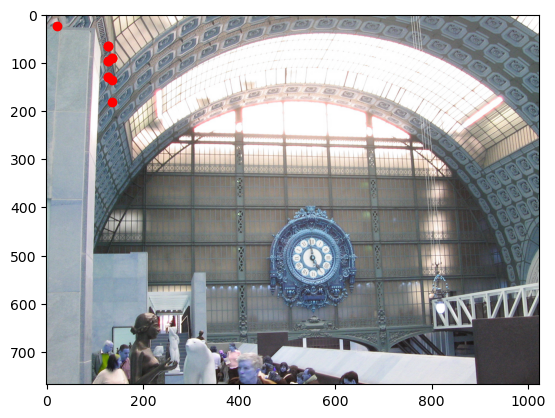

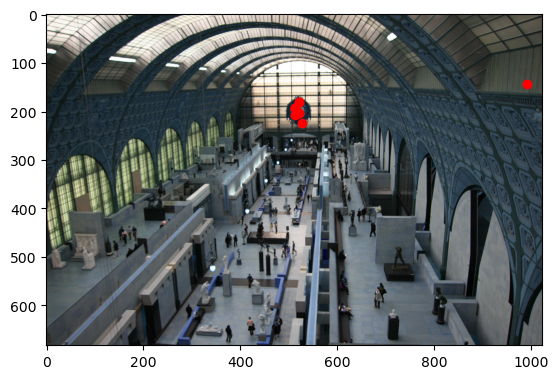

In [51]:
#visualize SP matching for the selected image pairs
import os
img_dir='/root/revisitop/data/oxford5k/jpg'
img_dir='/root/revisitop/data/paris6k/jpg'
# read the pkl file
import pickle
#with open('/root/revisitop/data/roxford5k/gnd_roxford5k.pkl', 'rb') as f:
with open('/root/revisitop/data/rparis6k/gnd_rparis6k.pkl', 'rb') as f:
    gnd = pickle.load(f)
    imlist = gnd['imlist']
    qimlist = gnd['qimlist']
query_image_path=os.path.join(img_dir, qimlist[int(query_index)] )+'.jpg'
db_image_path=os.path.join(img_dir, imlist[int(db_index)])+ '.jpg'

# read the image
import cv2
query_image=cv2.imread(query_image_path)
db_image=cv2.imread(db_image_path)

# visualize the matching result (b_point, a_point)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure()
plt.imshow(query_image)
plt.scatter(a_point[:,1], a_point[:,0], c='r')
plt.figure()
plt.imshow(db_image)
plt.scatter(b_point[:,1], b_point[:,0], c='r')
plt.show()




In [12]:
query_image_path


'/root/revisitop/data/rparis6k/jpg/paris_defense_000605.jpg'

In [46]:
#visualize HD matching for the selected image pairs
import numpy as np
import sys
sys.path.append('/root/Hypergraph-segment-retrieval')
run_dir='/root/Hypergraph-segment-retrieval/'
from hypergraph_propagation_vis import propagate, prepare_hypergraph_propagation
retrieval_dataset='roxford'
retrieval_dataset='rparis'
prepare_hypergraph_propagation(retrieval_dataset,run_dir)

if retrieval_dataset=='roxford':
    vecs=np.load(run_dir+'/features/roxford_np_delg_features/a_global_vecs.npy').T # (2048,4993)
    qvecs=np.load(run_dir+'/features/roxford_np_delg_features/a_global_qvecs.npy').T #(2048,70)

elif retrieval_dataset=='rparis':
    vecs=np.load(run_dir+'/features/rparis_np_delg_features/a_global_vecs.npy').T 
    qvecs=np.load(run_dir+'/features/rparis_np_delg_features/a_global_qvecs.npy').T 
    
elif retrieval_dataset=='R1Moxford':
    distractors=np.load(run_dir+'/features/distractor_np_delg_features/a_global_vecs.npy').T
    vecs=np.load(run_dir+'/features/roxford_np_delg_features/a_global_vecs.npy').T # (2048,4993)
    vecs=np.concatenate((vecs,distractors),axis=1) #()
    del distractors
    qvecs=np.load(run_dir+'/features/roxford_np_delg_features/a_global_qvecs.npy').T #(2048,70) 
    
elif retrieval_dataset=='R1Mparis':
    distractors=np.load(run_dir+'/features/distractor_np_delg_features/a_global_vecs.npy').T
    vecs=np.load(run_dir+'/features/rparis_np_delg_features/a_global_vecs.npy').T # (2048,6322)
    vecs=np.concatenate((vecs,distractors),axis=1) #()
    qvecs=np.load(run_dir+'/features/rparis_np_delg_features/a_global_qvecs.npy').T #(2048,70)  

qscores=np.dot(vecs.T,qvecs) #(4993,70) 
qranks=np.argsort(-qscores,axis=0) #(4993, 70)



In [52]:
q=int(query_index)
db=int(db_index)
first_search=list(qranks[:,q])
dominant_image=first_search[0]

rank_list, up_stop_region, up_stop=propagate([dominant_image])


In [53]:
up=db
while up != dominant_image:
    up=up_stop[up]
    print(up)
    


5793
3752


/root/revisitop/data/paris6k/jpg/paris_museedorsay_001057.jpg


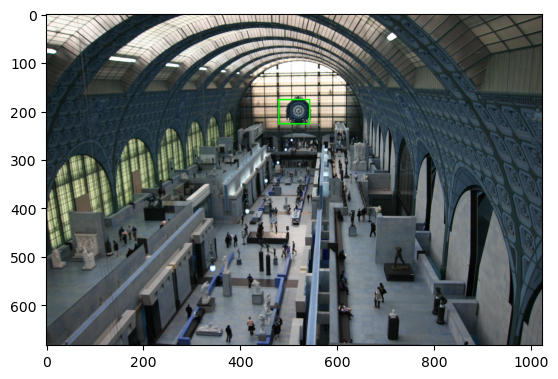

/root/revisitop/data/paris6k/jpg/paris_museedorsay_000924.jpg


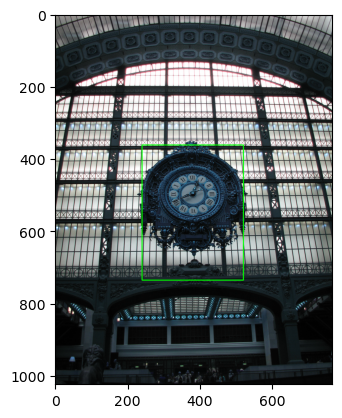

/root/revisitop/data/paris6k/jpg/paris_museedorsay_000825.jpg


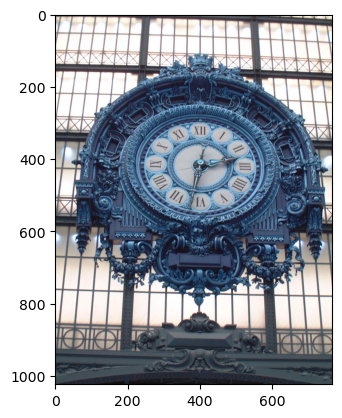

In [54]:
# draw the image and the region
import os
import cv2
import matplotlib.pyplot as plt
img_dir='/root/revisitop/data/oxford5k/jpg'
img_dir='/root/revisitop/data/paris6k/jpg'
# read the pkl file
import pickle
#with open('/root/revisitop/data/roxford5k/gnd_roxford5k.pkl', 'rb') as f:
with open('/root/revisitop/data/rparis6k/gnd_rparis6k.pkl', 'rb') as f:
    gnd = pickle.load(f)
    imlist = gnd['imlist']
    qimlist = gnd['qimlist']

up_index=db

while True:
    #draw the image and the region (up, down, left, right   )
    up_path=os.path.join(img_dir, imlist[int(up_index)] )+'.jpg'
    print(up_path)
    up_image=cv2.imread(up_path)
    up, down, left, right=up_stop_region[up_index]
    cv2.rectangle(up_image, (int(left), int(up)), (int(right), int(down)), (0, 255, 0), 2)

    plt.figure()
    plt.imshow(up_image)
    plt.show()
    
    if up_index == dominant_image:
        break
    up_index=up_stop[up_index]
    



In [56]:
print(qimlist[26])
print(imlist[3479])

paris_museedorsay_000012
paris_pantheon_001140
